In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

# from example_1 import predict, print_tree
# from problem_1 import build_tree, error_matrix, error_metrics
from problem_2 import build, predict, print_tree, error_matrix, error_metrics

### Set parameters

In [2]:
deeps = range(1, 11, 1)

In [3]:
metric_labels = {
    0: 'accuracy',
    1: 'precision',
    2: 'recall',
    3: 'f-score'
}

dataset_labels = {
    0: 'train',
    1: 'test'
}

In [4]:
colors = {
    'base': ['red', 'blue'],
    'light': ['lightcoral', 'lightblue']
}
colors = {key: ListedColormap(value) for key, value in colors.items()}

In [5]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=5
)

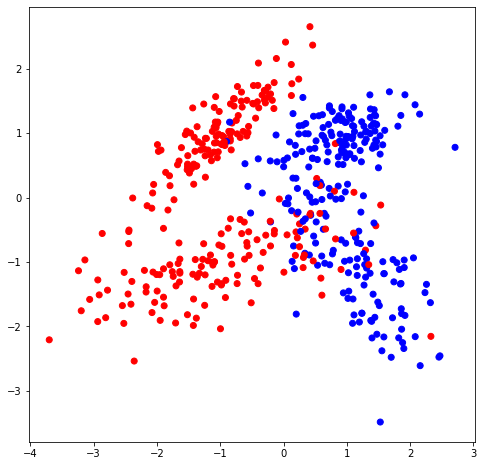

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=colors['base'])

plt.show()

### Split dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25, random_state = 1
)

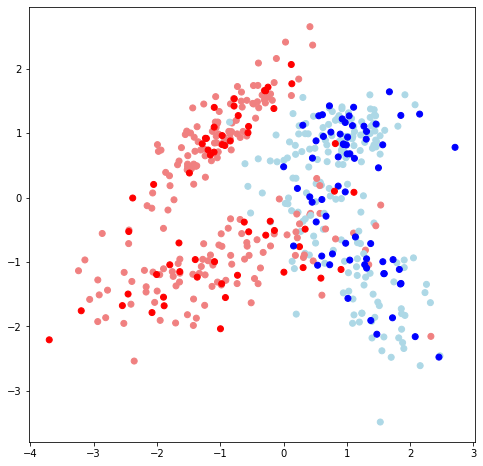

In [8]:
plt.figure(figsize=(8, 8))

plt.scatter(x=X_train[:, 0], y=X_train[:, 1],c=y_train, cmap=colors['light'])
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=colors['base'])   

plt.show()

### Build trees

In [9]:
# trees = [build_tree(X_train, y_train, level_max=deep) for deep in deeps]
trees = [build(X_train, y_train, lev_max=deep) for deep in deeps]

### Make predictions

In [10]:
X_ = (X_train, X_test)
y_ = (y_train, y_test)

z_ = [
    [predict(_, tree) for _ in X_]
    for tree in trees
]

In [11]:
metrics = [
    [
        error_metrics(error_matrix(*_))
        for _ in zip(z_[deep_index], y_)
    ]
    for deep_index in range(len(deeps))
]

metrics = np.array(metrics)

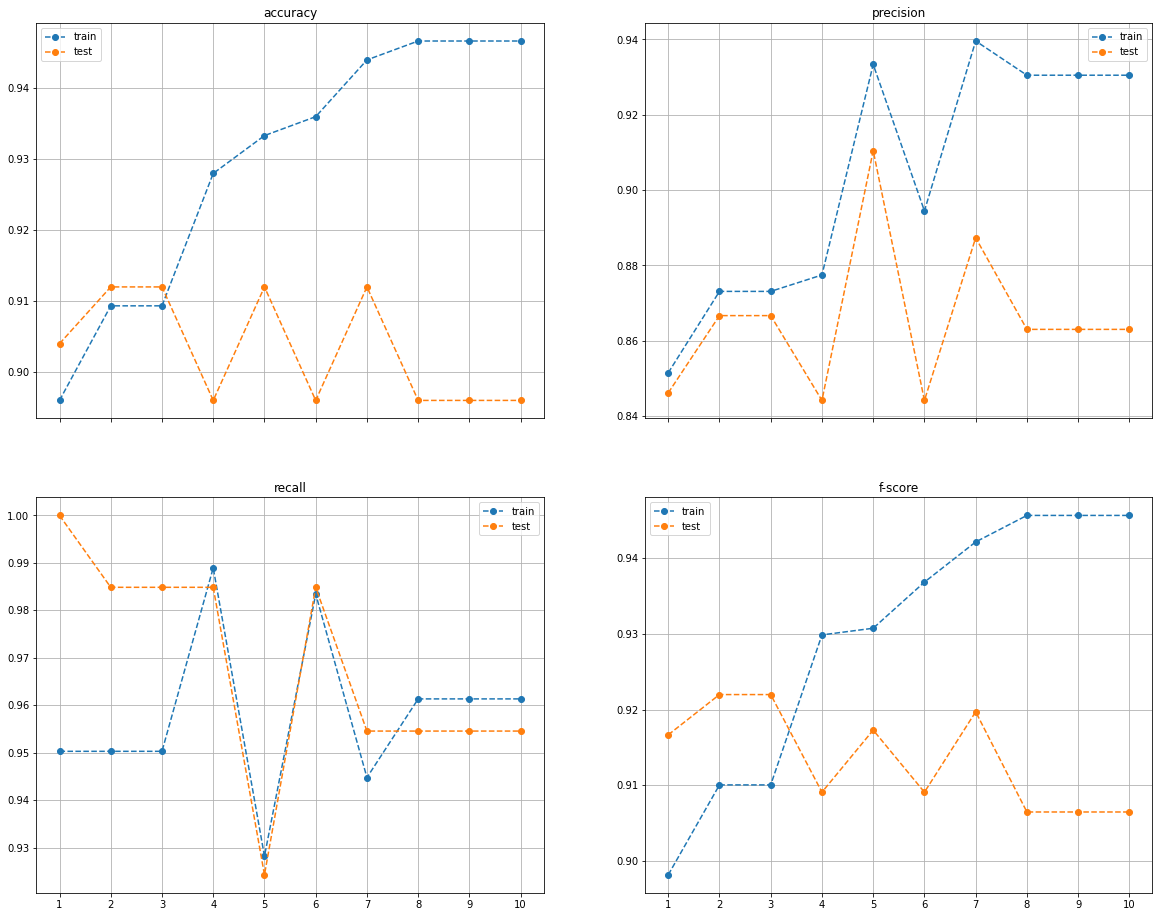

In [12]:
fig, axs = plt.subplots(
    nrows=2, ncols=2,
    sharex=True,
    figsize=(20, 16)
)

for metric_index, metric_label in metric_labels.items():
    axs.flat[metric_index].set_title(metric_label)
    for dataset_index, dataset_label in dataset_labels.items():
        axs.flat[metric_index].plot(
            deeps, metrics[:, dataset_index, metric_index],
            'o--',
            label=dataset_label
        )
    axs.flat[metric_index].set_xticks(deeps)
    axs.flat[metric_index].grid()    
    axs.flat[metric_index].legend()

plt.show()

In [13]:
deep = 3
for i in range(0, deeps.index(deep) + 1, 1):
    print(f'deep: {deeps[i]}')
    print_tree(trees[i])
    print()

deep: 1
index: 0
value: -0.14759001878581768
true:
	prediction: 0
false:
	prediction: 1

deep: 2
index: 0
value: -0.14759001878581768
true:
	index: 0
	value: -0.6155982366664923
	true:
		prediction: 0
	false:
		prediction: 0
false:
	index: 1
	value: 1.5936907427978344
	true:
		prediction: 1
	false:
		prediction: 0

deep: 3
index: 0
value: -0.14759001878581768
true:
	index: 0
	value: -0.6155982366664923
	true:
		index: 0
		value: -0.9120968201453599
		true:
			prediction: 0
		false:
			prediction: 0
	false:
		index: 1
		value: 0.5998027155739418
		true:
			prediction: 0
		false:
			prediction: 0
false:
	index: 1
	value: 1.5936907427978344
	true:
		index: 1
		value: 0.29547023387161064
		true:
			prediction: 1
		false:
			prediction: 1
	false:
		prediction: 0

